<a href="https://colab.research.google.com/github/HomayounSoleimani/Python-for-Machine-Learning-and-Artificial-Neural-Networks/blob/master/1_05_SVM_on_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [2]:
dataset = pd.read_csv('Iris.csv')
dataset.dropna()
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X_data = dataset.iloc[:, 1:5].values
X_data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
Y_data = dataset.iloc[:, -1].values
Y_data[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [5]:
np.unique(Y_data)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
le = LabelEncoder()
Y_data = le.fit_transform(Y_data)
np.unique(Y_data)

array([0, 1, 2])

In [0]:
scaler = StandardScaler()
X_new_data = scaler.fit_transform(X_data)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_new_data, Y_data, test_size=0.2)

In [0]:
clf = SVC(gamma=0.2, C=1)
clf.fit(x_train, y_train)
train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)

In [19]:
print("Train Score for iris dataset SVC model {:.2f} %".format(train_score))
print("Test Score for iris dataset SVC model {:.2f} %".format(test_score))

Train Score for iris dataset SVC model 0.97 %
Test Score for iris dataset SVC model 1.00 %


In [0]:
results = cross_val_score(clf, x_test, y_test, cv=5)
print(results)

[ 1.          1.          0.66666667  0.83333333  1.        ]


In [20]:
X_predict = np.array([[4.6,3.1,1.5,0.2]])
X_predict.shape

(1, 4)

In [21]:
clf.predict(X_predict)

array([2])

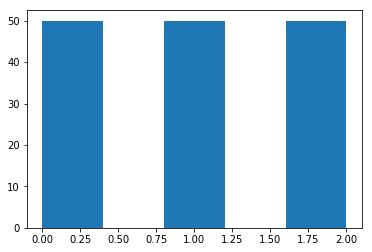

In [22]:
plt.hist(Y_data, bins=5)
plt.show()